<ipython-input-36-4aca3ad3ef69>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  drive_data['hour'] = pd.to_datetime(drive_data['Date']).dt.hour


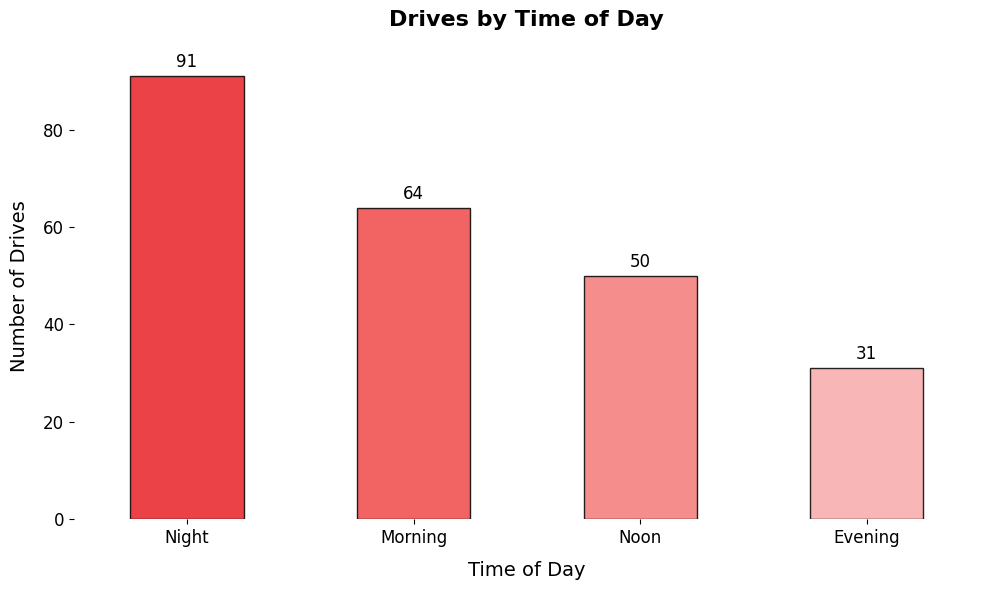

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Drive-data-01_10_2025, 04_14_38 PM.csv'
drive_data = pd.read_csv(file_path)

# Extract the hour of the day from the 'Date' column
drive_data['hour'] = pd.to_datetime(drive_data['Date']).dt.hour

# Classify the hours into time periods
def classify_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Noon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

drive_data['time_of_day'] = drive_data['hour'].apply(classify_time_of_day)

# Count the number of drives for each time period
time_of_day_counts = drive_data['time_of_day'].value_counts()

# Define Tesla red gradient colors with transparency
colors = ['#E82127', '#F04848', '#F47979', '#F9AAAA']

# Plot the results
plt.figure(figsize=(10, 6))
bars = time_of_day_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.85)

# Add title and labels with enhanced styling
plt.title('Drives by Time of Day', fontsize=16, weight='bold', pad=20)
plt.xlabel('Time of Day', fontsize=14, labelpad=10)
plt.ylabel('Number of Drives', fontsize=14, labelpad=10)

# Remove all spines and grids for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Add bar values for clarity
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1,
             int(bar.get_height()),
             ha='center',
             va='bottom',
             fontsize=12)

# Adjust tick labels
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**H₀:** The distribution of the number of drives is uniform across different times of the day (Morning, Noon, Evening, Night).

**H₁:** The distribution of the number of drives varies significantly across different times of the day (Morning, Noon, Evening, Night).

Observed Counts: [91 64 50 31]
Expected Counts (Uniform Distribution): [59 59 59 59]
Chi-Square Statistic: 32.441
P-Value: 0.000
Reject the null hypothesis: The number of drives varies significantly by time of day.


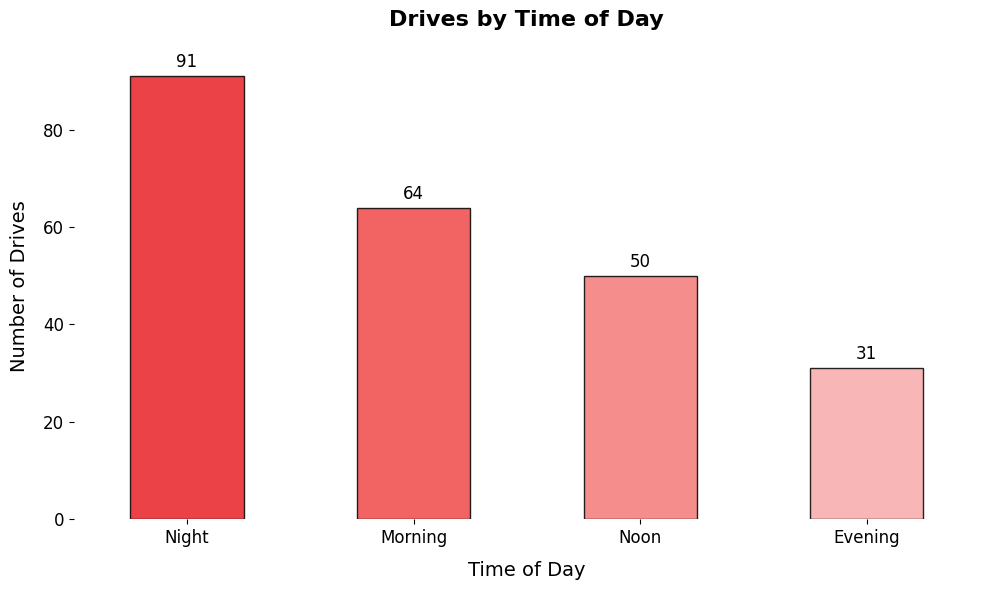

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Drive-data-01_10_2025, 04_14_38 PM.csv'
drive_data = pd.read_csv(file_path)

# Correct the date format
drive_data['hour'] = pd.to_datetime(drive_data['Date'], format='%m/%d/%Y, %I:%M:%S %p').dt.hour

# Classify the hours into time periods
def classify_time_of_day(hour):
    if 5 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Noon'
    elif 17 <= hour <= 20:
        return 'Evening'
    else:
        return 'Night'

drive_data['time_of_day'] = drive_data['hour'].apply(classify_time_of_day)

# Count the number of drives for each time period
time_of_day_counts = drive_data['time_of_day'].value_counts()

# Perform Chi-Square Goodness-of-Fit Test
# Null hypothesis: The drives are evenly distributed across time periods.
observed = time_of_day_counts.values
expected = np.full_like(observed, fill_value=np.mean(observed))  # Uniform distribution assumption

chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Print results
print("Observed Counts:", observed)
print("Expected Counts (Uniform Distribution):", expected)
print(f"Chi-Square Statistic: {chi_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The number of drives varies significantly by time of day.")
else:
    print("Fail to reject the null hypothesis: The number of drives does not vary significantly by time of day.")

# Plot the results
# Define Tesla red gradient colors with transparency
colors = ['#E82127', '#F04848', '#F47979', '#F9AAAA']

plt.figure(figsize=(10, 6))
bars = time_of_day_counts.plot(kind='bar', color=colors, edgecolor='black', alpha=0.85)

# Add title and labels with enhanced styling
plt.title('Drives by Time of Day', fontsize=16, weight='bold', pad=20)
plt.xlabel('Time of Day', fontsize=14, labelpad=10)
plt.ylabel('Number of Drives', fontsize=14, labelpad=10)

# Remove all spines and grids for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Add bar values for clarity
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 1,
             int(bar.get_height()),
             ha='center',
             va='bottom',
             fontsize=12)

# Adjust tick labels
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Dataset Summary:
        percentage  charging_power
count  9471.000000     9471.000000
mean     61.758104       31.654736
std      22.270604       36.626017
min       8.000000        1.000000
25%      44.000000        4.000000
50%      62.000000        7.000000
75%      80.000000       62.000000
max      99.000000      726.000000

Missing Values:
percentage        0
charging_power    0
dtype: int64


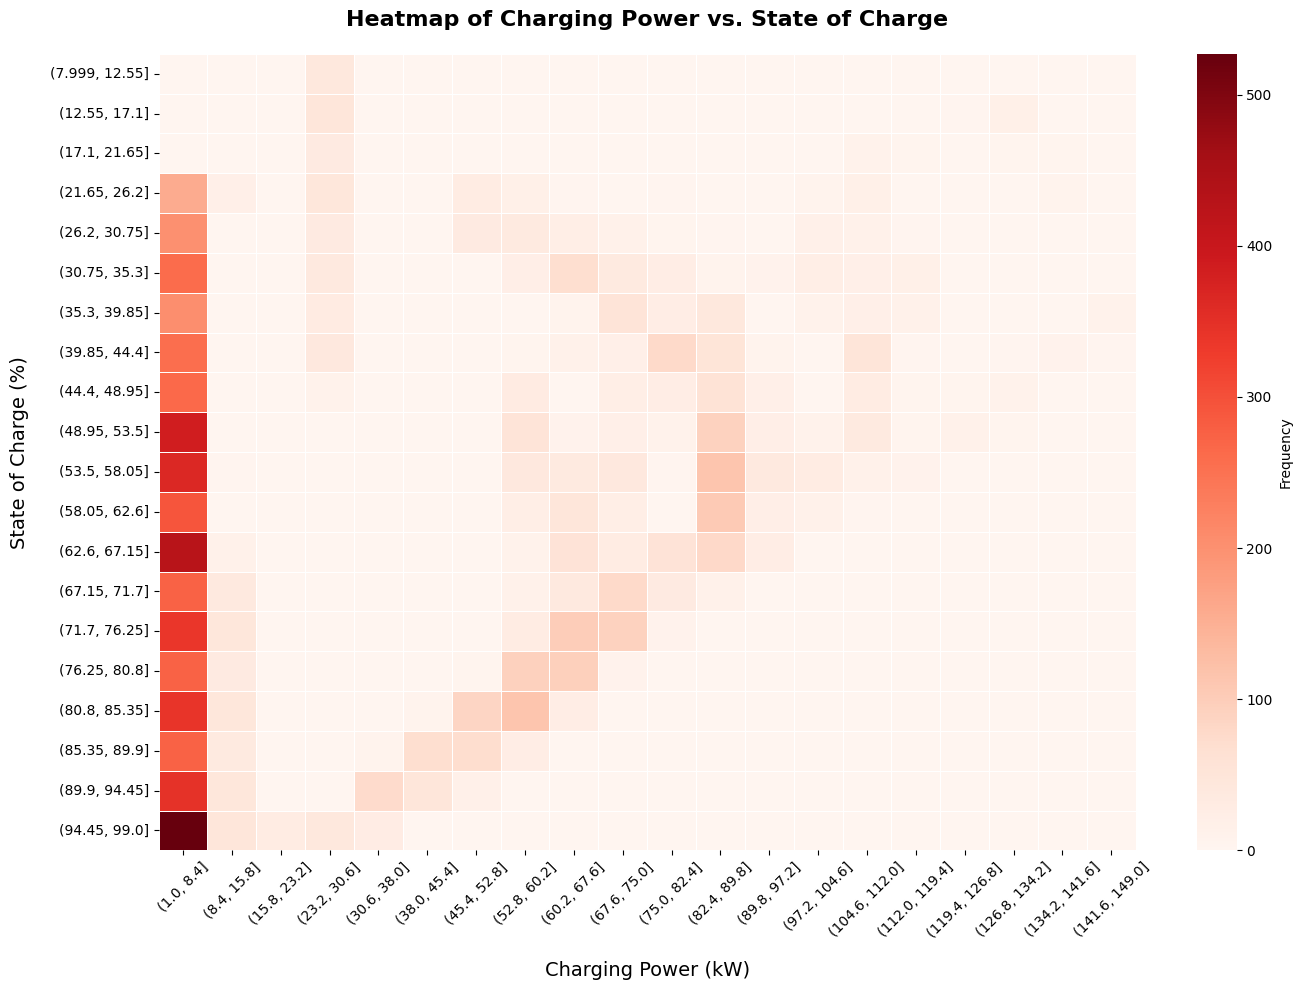

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset
file_path = '/content/Charging curve-data-01_10_2025, 05_14_23 PM.csv'  # Adjust the path if needed
new_data = pd.read_csv(file_path)

# Ensure columns are numeric
new_data['percentage'] = pd.to_numeric(new_data['SOC [%]'], errors='coerce')
new_data['charging_power'] = pd.to_numeric(new_data['Power [kW]'], errors='coerce')

# Drop rows with NaN values
new_data = new_data.dropna(subset=['percentage', 'charging_power'])

# Step 1: Analyze the data
# Summarize the relevant columns
print("Dataset Summary:")
print(new_data[['percentage', 'charging_power']].describe())

# Check for missing values
print("\nMissing Values:")
print(new_data[['percentage', 'charging_power']].isnull().sum())

# Step 2: Remove outliers (if necessary)
# Calculate IQR for both columns
q1_power, q3_power = new_data['charging_power'].quantile([0.25, 0.75])
iqr_power = q3_power - q1_power

q1_soc, q3_soc = new_data['percentage'].quantile([0.25, 0.75])
iqr_soc = q3_soc - q1_soc

# Define outlier thresholds
lower_power, upper_power = q1_power - 1.5 * iqr_power, q3_power + 1.5 * iqr_power
lower_soc, upper_soc = q1_soc - 1.5 * iqr_soc, q3_soc + 1.5 * iqr_soc

# Filter out outliers
filtered_data = new_data[
    (new_data['charging_power'] >= lower_power) & (new_data['charging_power'] <= upper_power) &
    (new_data['percentage'] >= lower_soc) & (new_data['percentage'] <= upper_soc)
]

# Step 3: Create dynamic bins for the heatmap
soc_bins = np.linspace(filtered_data['percentage'].min(), filtered_data['percentage'].max(), 21)
power_bins = np.linspace(filtered_data['charging_power'].min(), filtered_data['charging_power'].max(), 21)

# Create a pivot table for the heatmap
heatmap_data = pd.crosstab(
    pd.cut(filtered_data['percentage'], bins=soc_bins, include_lowest=True),
    pd.cut(filtered_data['charging_power'], bins=power_bins)
)

# Step 4: Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap="Reds",
    cbar_kws={'label': 'Frequency'},
    annot=False,
    fmt='d',
    linewidths=0.5
)

# Add labels and title
plt.title("Heatmap of Charging Power vs. State of Charge", fontsize=16, weight="bold", pad=20)
plt.xlabel("Charging Power (kW)", fontsize=14, labelpad=15)
plt.ylabel("State of Charge (%)", fontsize=14, labelpad=15)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**H₀: The SOC (%) and charging power are not significantly correlated.**

**H₁: The SOC (%) and charging power are significantly correlated.**


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load the dataset (replace with actual file path)
file_path = '/content/Charging curve-data-01_10_2025, 05_14_23 PM.csv'
charging_curve_data = pd.read_csv(file_path)

# Ensure columns are numeric
charging_curve_data['percentage'] = pd.to_numeric(charging_curve_data['SOC [%]'], errors='coerce')
charging_curve_data['charging_power'] = pd.to_numeric(charging_curve_data['Power [kW]'], errors='coerce')

# Drop rows with NaN values
charging_curve_data = charging_curve_data.dropna(subset=['percentage', 'charging_power'])

# Extract the relevant columns
soc = charging_curve_data['percentage']
power = charging_curve_data['charging_power']

# Pearson Correlation Test
pearson_corr, pearson_p_value = pearsonr(soc, power)
print(f"Pearson Correlation Coefficient: {pearson_corr:.3f}")
print(f"P-value for Pearson's Test: {pearson_p_value:.3f}")

# Spearman Correlation Test
spearman_corr, spearman_p_value = spearmanr(soc, power)
print(f"Spearman Correlation Coefficient: {spearman_corr:.3f}")
print(f"P-value for Spearman's Test: {spearman_p_value:.3f}")

# Conclusion
alpha = 0.05  # Significance level
if pearson_p_value < alpha:
    print("Pearson's test: Significant correlation between SOC (%) and charging power.")
else:
    print("Pearson's test: No significant correlation between SOC (%) and charging power.")

if spearman_p_value < alpha:
    print("Spearman's test: Significant correlation between SOC (%) and charging power.")
else:
    print("Spearman's test: No significant correlation between SOC (%) and charging power.")


Pearson Correlation Coefficient: -0.260
P-value for Pearson's Test: 0.000
Spearman Correlation Coefficient: -0.135
P-value for Spearman's Test: 0.000
Pearson's test: Significant correlation between SOC (%) and charging power.
Spearman's test: Significant correlation between SOC (%) and charging power.


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the TeslaMate charging data
file_path = 'Charger type_ All-data-12_26_2024, 02_28_17 PM.csv'
data = pd.read_csv(file_path)

# Summing energy consumption by charge type (AC/DC)
charge_energy_by_type = data.groupby('charge_type')['charge_energy_added'].sum()

# Calculate percentages
charge_percent = (charge_energy_by_type / charge_energy_by_type.sum() * 100).round(2)

# Prepare data for interactive chart
labels = charge_energy_by_type.index
values = charge_energy_by_type.values

# Create the interactive pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    textinfo='label+percent',
    insidetextorientation='radial',
    hoverinfo='label+value+percent',
    marker=dict(colors=['white', '#E82127'], line=dict(color='#2C2C2E', width=2))
)])

# Update layout for dark theme and styling
fig.update_layout(
    title=dict(
        text="Distribution of Total kWh Gained by Charger Type",
        font=dict(size=20, color='white'),
        x=0.5
    ),
    font=dict(color='white'),
    paper_bgcolor='#2C2C2E',
    plot_bgcolor='#2C2C2E'
)

# Show the interactive chart
fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the TeslaMate charging data
file_path = 'Charger type_ All-data-12_26_2024, 02_28_17 PM.csv'
data = pd.read_csv(file_path)

# Summing total duration by charge type (AC/DC)
duration_by_type = data.groupby('charge_type')['duration_min'].sum()

# Prepare data for the pie chart
labels = duration_by_type.index
values = duration_by_type.values

# Create the interactive pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    textinfo='label+percent',
    insidetextorientation='radial',
    hoverinfo='label+value+percent',
    marker=dict(colors=['white', '#E82127'], line=dict(color='#2C2C2E', width=2))
)])

# Update layout for dark theme and styling
fig.update_layout(
    title=dict(
        text="Distribution of Total Charging Duration (AC/DC)",
        font=dict(size=20, color='white'),
        x=0.5
    ),
    font=dict(color='white'),
    paper_bgcolor='#2C2C2E',
    plot_bgcolor='#2C2C2E'
)

# Show the interactive chart
fig.show()


<ipython-input-34-50b2cae130e0>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['start_time'] = pd.to_datetime(data['Date'], errors='coerce')


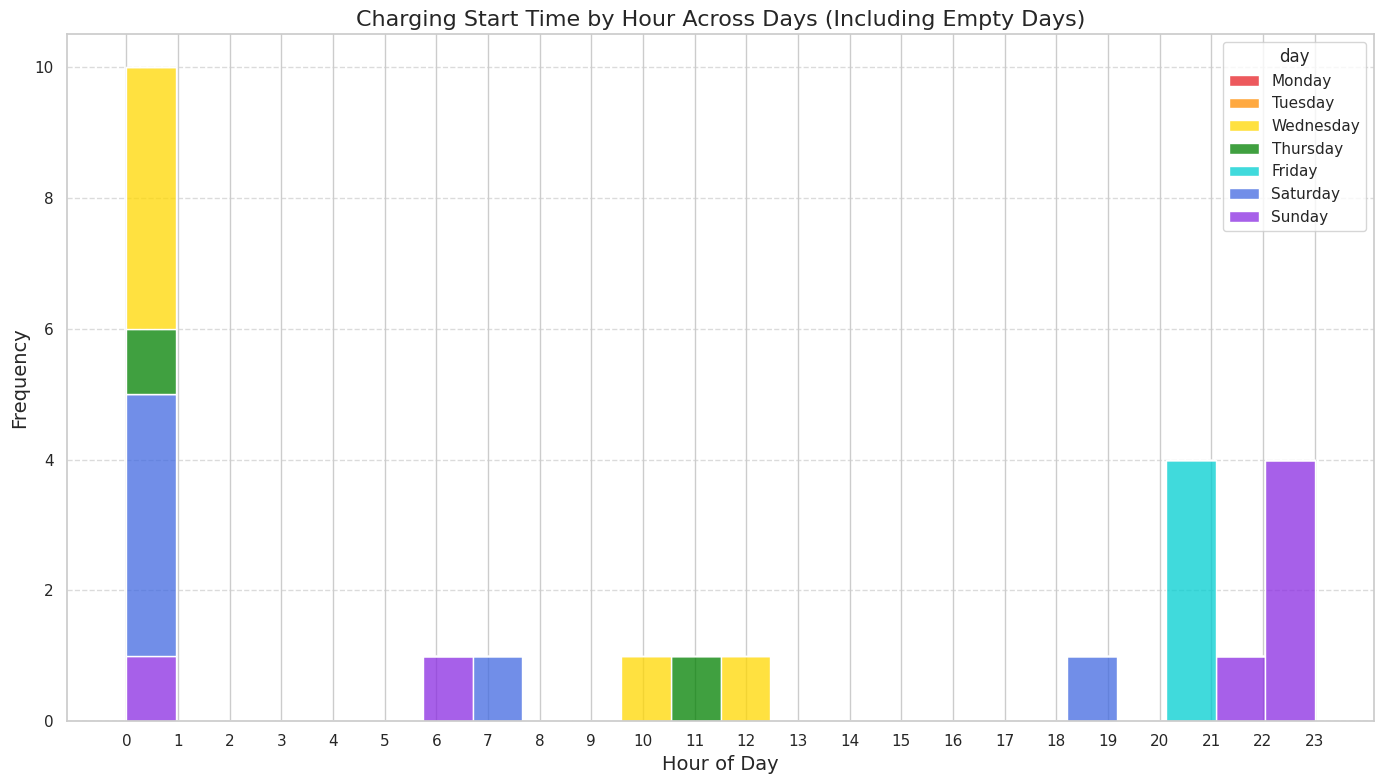

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_name = "Charger type_ All-data-12_28_2024, 03_48_16 PM.csv"  # Replace with your file name
data = pd.read_csv(file_name, skiprows=1)  # Skipping the first row to handle messy headers

# Extracting and cleaning the "Date" column to get start times
data['start_time'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter rows where the date was successfully parsed
data_cleaned = data.dropna(subset=['start_time'])

# Extracting time and day for visualization
data_cleaned['hour'] = data_cleaned['start_time'].dt.hour
data_cleaned['day'] = data_cleaned['start_time'].dt.day_name()

# Ensure all days of the week are represented, even with zero counts
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_cleaned['day'] = pd.Categorical(data_cleaned['day'], categories=day_order, ordered=True)

# Create a dataframe with all combinations of hours and days
all_hours = pd.DataFrame({'hour': range(0, 24)})
all_combinations = pd.merge(
    pd.DataFrame({'day': day_order}),
    all_hours,
    how='cross'
)

# Merge to ensure all combinations exist
merged_data = pd.merge(all_combinations, data_cleaned, how='left', on=['day', 'hour'])
merged_data['count'] = merged_data.groupby(['day', 'hour'])['start_time'].transform('count').fillna(0)

# Visualize the times you started charging on different days
plt.figure(figsize=(14, 8))
sns.histplot(
    data=merged_data,
    x='hour',
    weights='count',
    hue='day',
    multiple='stack',
    bins=24,
    palette=["#E82127", "#FF8C00", "#FFD700", "#008000", "#00CED1", "#4169E1", "#8A2BE2"],
    hue_order=day_order
)

# Customize the plot
plt.title('Charging Start Time by Hour Across Days (Including Empty Days)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image file
plt.tight_layout()
plt.savefig("charging_start_time_visualization_complete.png", dpi=300)
plt.show()


<ipython-input-39-682ea81af9d3>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['start_time'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-39-682ea81af9d3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


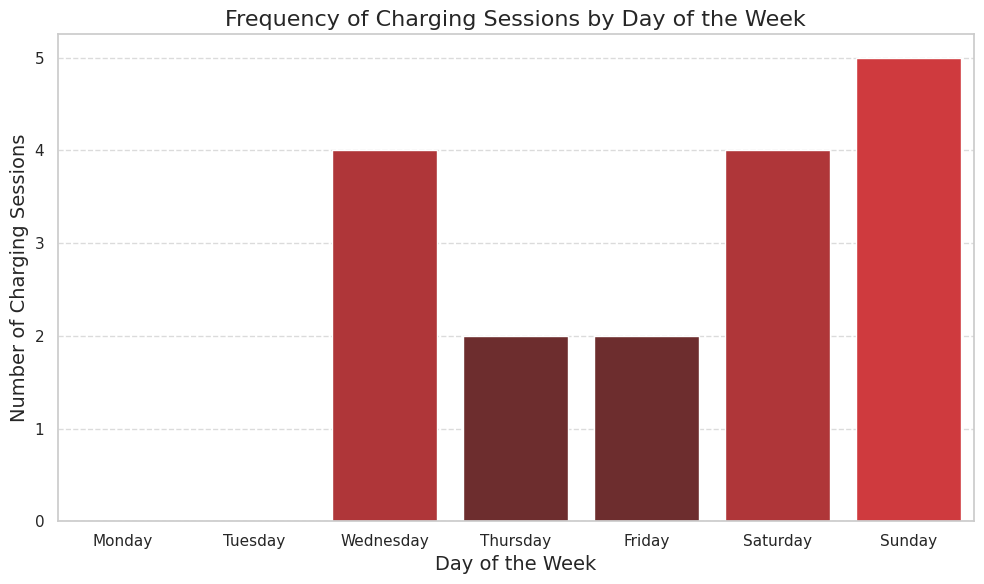

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_name = "Charger type_ All-data-12_28_2024, 03_48_16 PM.csv"  # Replace with your file name
data = pd.read_csv(file_name, skiprows=1)  # Skipping the first row to handle messy headers

# Extracting and cleaning the "Date" column to get start times
data['start_time'] = pd.to_datetime(data['Date'], errors='coerce')

# Filter rows where the date was successfully parsed
data_cleaned = data.dropna(subset=['start_time'])

# Extracting the day of the week for visualization
data_cleaned['day'] = data_cleaned['start_time'].dt.day_name()

# Create a count for each day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = data_cleaned['day'].value_counts().reindex(day_order, fill_value=0)

# Normalize the counts to generate color intensities
max_count = day_counts.max()
normalized_intensity = (day_counts / max_count).fillna(0)  # Normalize between 0 and 1

# Create a gradient color palette based on user preference (#E82127)
base_color = "#E82127"
custom_palette = [sns.dark_palette(base_color, n_colors=100, reverse=False)[int(intensity * 99)]
                  for intensity in normalized_intensity]

# Plotting the frequency of charging for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(
    x=day_counts.index,
    y=day_counts.values,
    palette=custom_palette
)

# Customize the plot
plt.title('Frequency of Charging Sessions by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Charging Sessions', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image file
plt.tight_layout()
plt.savefig("charging_frequency_by_day_dynamic_theme.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import folium

# Load the new charging data file
file_path_new = 'Charging heat map by kWh-data-12_26_2024, 03_11_07 PM.csv'
charging_data = pd.read_csv(file_path_new)

# Ensure numeric data for total kWh by stripping units and converting to float
charging_data['chg_total'] = charging_data['chg_total'].str.replace(' kWh', '').astype(float)

# Initialize a map centered near the average latitude and longitude
m = folium.Map(location=[charging_data['latitude'].mean(), charging_data['longitude'].mean()], zoom_start=11)

# Add circle markers for each charging location
for index, row in charging_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5 + row['charges'] * 2,  # Base size + adjust size based on charging count
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=(
            f"<b>Location:</b> {row['loc_nm']}<br>"
            f"<b>Total Energy:</b> {row['chg_total']} kWh<br>"
            f"<b>Charging Count:</b> {row['charges']}"
        )
    ).add_to(m)




In [ ]:
print(data.columns)



Index(['start_date_ts', 'end_date_ts', 'car_id', 'start_path', 'end_path',
       'duration_str', 'drive_id', 'Date', 'Start', 'Destination', 'Duration',
       'Distance', '% Start', '% End', 'Temp', '√ò Speed', 'max Speed',
       'max Power', '‚ùÑ', 'Efficiency', 'Energy consumed (net)',
       '√ò Consumption (net)', 'start_lat', 'start_lon', 'formatted_date',
       'start_weather'],
      dtype='object')


In [ ]:
print(data['Efficiency'].head())


0      NaN
1    0.676
2    0.789
3    1.040
4    0.596
Name: Efficiency, dtype: float64


In [ ]:
if 'Efficiency' in data.columns:
    data['Efficiency (%)'] = data['Efficiency'] * 100  # Assuming Efficiency is already numeric
else:
    print("Efficiency column not found!")


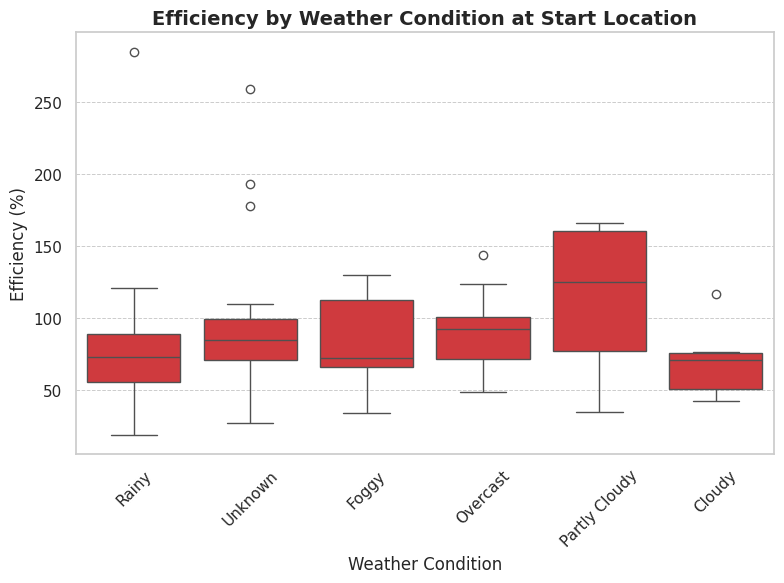

<ipython-input-26-0bba69d1e709>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='start_weather', y='Efficiency (%)', data=data, ci=None, color=custom_color)


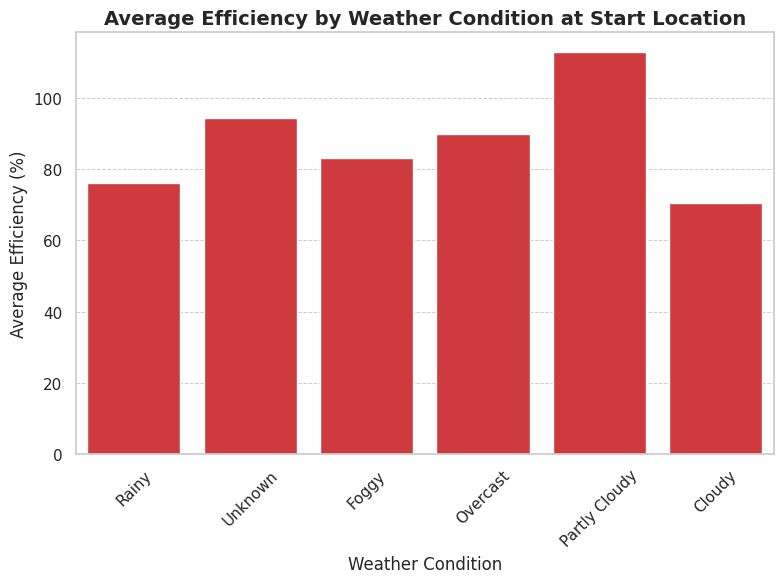

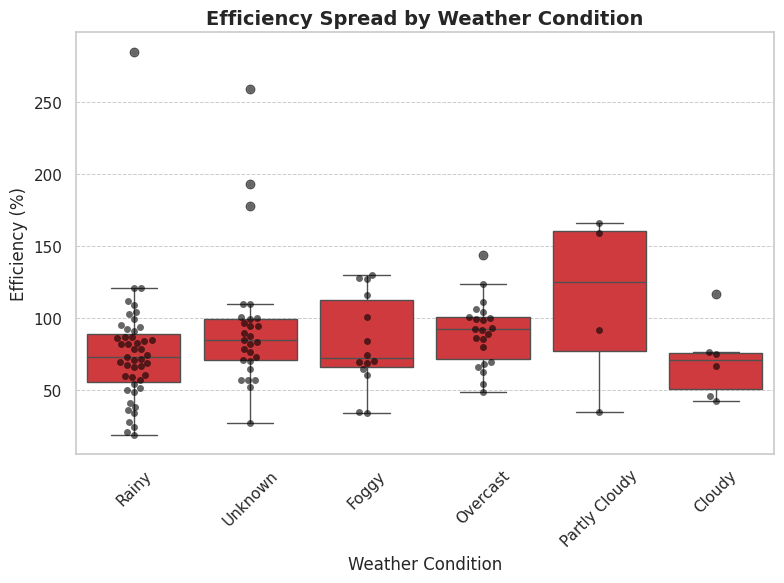

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set your preferred style and color
sns.set_theme(style="whitegrid")
custom_color = "#E82127"

# Boxplot: Efficiency by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='start_weather', y='Efficiency (%)', data=data, color=custom_color)
plt.title('Efficiency by Weather Condition at Start Location', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Barplot: Average Efficiency by Weather Condition
plt.figure(figsize=(8, 6))
sns.barplot(x='start_weather', y='Efficiency (%)', data=data, ci=None, color=custom_color)
plt.title('Average Efficiency by Weather Condition at Start Location', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Efficiency (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Swarmplot: Overlay individual points on Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='start_weather', y='Efficiency (%)', data=data, color=custom_color)
sns.swarmplot(x='start_weather', y='Efficiency (%)', data=data, color="black", alpha=0.6)
plt.title('Efficiency Spread by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Efficiency (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'datalast.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Step 1: Inspect and Rename Columns
print(data.columns.tolist())  # Inspect column names

# Rename the "Ø Consumption (net)" column to avoid issues
data.rename(columns={'Ø Consumption (net)': 'Consumption (Wh/km)'}, inplace=True)

# Step 2: Extract latitude and longitude for start locations
def extract_coordinates(path):
    match = re.search(r'lat=([0-9.\-]+)&lng=([0-9.\-]+)', path)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

data[['start_lat', 'start_lon']] = data['start_path'].apply(lambda x: pd.Series(extract_coordinates(x)))
data['formatted_date'] = pd.to_datetime(data['Date']).dt.strftime('%Y-%m-%d')

# Step 3: Optimize weather fetching with unique combinations
unique_start_locations = data[['start_lat', 'start_lon', 'formatted_date']].drop_duplicates()
weather_cache = {}

# Function to fetch weather data
def fetch_weather(lat, lon, date):
    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": lat,
        "longitude": lon,
        "daily": "weathercode",
        "start_date": date,
        "end_date": date,
        "timezone": "auto"
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200 and 'daily' in response.json():
        weather_code = response.json()['daily']['weathercode'][0]
        weather_mapping = {
            0: "Clear",
            1: "Partly Cloudy",
            2: "Cloudy",
            3: "Overcast",
            45: "Foggy",
            48: "Rime Fog",
            51: "Drizzle",
            61: "Rainy",
            71: "Snowy"
        }
        return weather_mapping.get(weather_code, "Unknown")
    return "Unknown"

# Fetch weather for unique locations only
for _, row in unique_start_locations.iterrows():
    lat, lon, date = row['start_lat'], row['start_lon'], row['formatted_date']
    weather_cache[(lat, lon, date)] = fetch_weather(lat, lon, date)

# Map fetched weather back to the dataset
data['start_weather'] = data.apply(
    lambda row: weather_cache.get((row['start_lat'], row['start_lon'], row['formatted_date']), "Unknown"),
    axis=1
)

# Step 4: Process Consumption Data
if 'Consumption (Wh/km)' in data.columns:
    data['Consumption (Wh/km)'] = data['Consumption (Wh/km)'].str.rstrip(' Wh/km').astype(float)

# Step 5: Visualize Average Consumption by Weather Condition
sns.set_theme(style="whitegrid")
custom_color = "#E82127"

# Boxplot: Average Consumption by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(x='start_weather', y='Consumption (Wh/km)', data=data, color=custom_color)
plt.title('Average Consumption by Weather Condition at Start Location', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Consumption (Wh/km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Barplot: Average Consumption by Weather Condition
plt.figure(figsize=(8, 6))
sns.barplot(x='start_weather', y='Consumption (Wh/km)', data=data, ci=None, color=custom_color)
plt.title('Average Consumption by Weather Condition at Start Location', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Consumption (Wh/km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Swarmplot: Overlay individual points on Boxplot for Consumption
plt.figure(figsize=(8, 6))
sns.boxplot(x='start_weather', y='Consumption (Wh/km)', data=data, color=custom_color)
sns.swarmplot(x='start_weather', y='Consumption (Wh/km)', data=data, color="black", alpha=0.6)
plt.title('Consumption Spread by Weather Condition', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Consumption (Wh/km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


['start_date_ts', 'end_date_ts', 'car_id', 'start_path', 'end_path', 'duration_str', 'drive_id', 'Date', 'Start', 'Destination', 'Duration', 'Distance', '% Start', '% End', 'Temp', '√ò Speed', 'max Speed', 'max Power', '‚ùÑ', 'Efficiency', 'Energy consumed (net)', '√ò Consumption (net)']


ValueError: Could not interpret value `Consumption (Wh/km)` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [ ]:
print(data.columns.tolist())


['start_date_ts', 'end_date_ts', 'car_id', 'start_path', 'end_path', 'duration_str', 'drive_id', 'Date', 'Start', 'Destination', 'Duration', 'Distance', '% Start', '% End', 'Temp', '√ò Speed', 'max Speed', 'max Power', '‚ùÑ', 'Efficiency', 'Energy consumed (net)', '√ò Consumption (net)', 'start_lat', 'start_lon', 'formatted_date', 'start_weather']


In [ ]:
data.rename(columns={'√ò Consumption (net)': 'Consumption (Wh/km)'}, inplace=True)


In [ ]:
if 'Consumption (Wh/km)' in data.columns:
    data['Consumption (Wh/km)'] = data['Consumption (Wh/km)'].str.rstrip(' Wh/km').astype(float)
else:
    print("Column 'Consumption (Wh/km)' not found!")


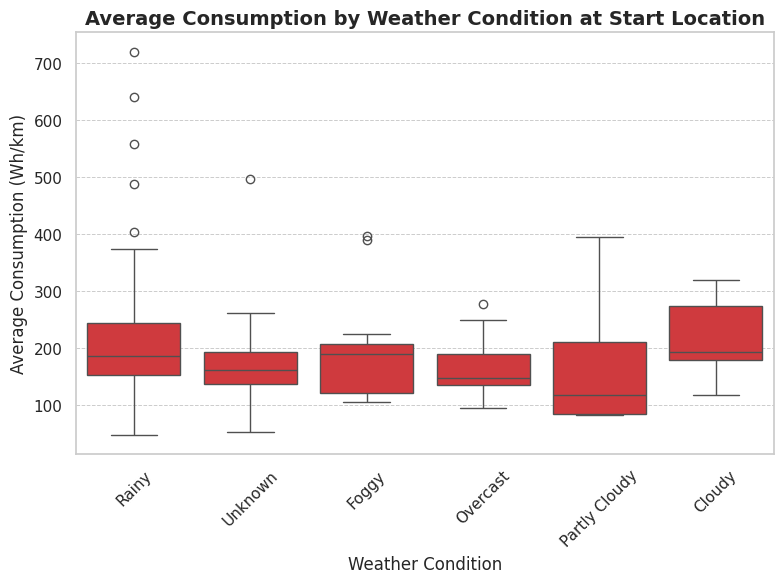

In [ ]:
# Rename the column correctly
data.rename(columns={'√ò Consumption (net)': 'Consumption (Wh/km)'}, inplace=True)

# Convert to numeric format
if 'Consumption (Wh/km)' in data.columns:
    data['Consumption (Wh/km)'] = data['Consumption (Wh/km)'].str.rstrip(' Wh/km').astype(float)
else:
    raise ValueError("Column 'Consumption (Wh/km)' not found!")

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='start_weather', y='Consumption (Wh/km)', data=data, color=custom_color)
plt.title('Average Consumption by Weather Condition at Start Location', fontsize=14, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Consumption (Wh/km)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


<ipython-input-49-85c80e73c542>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


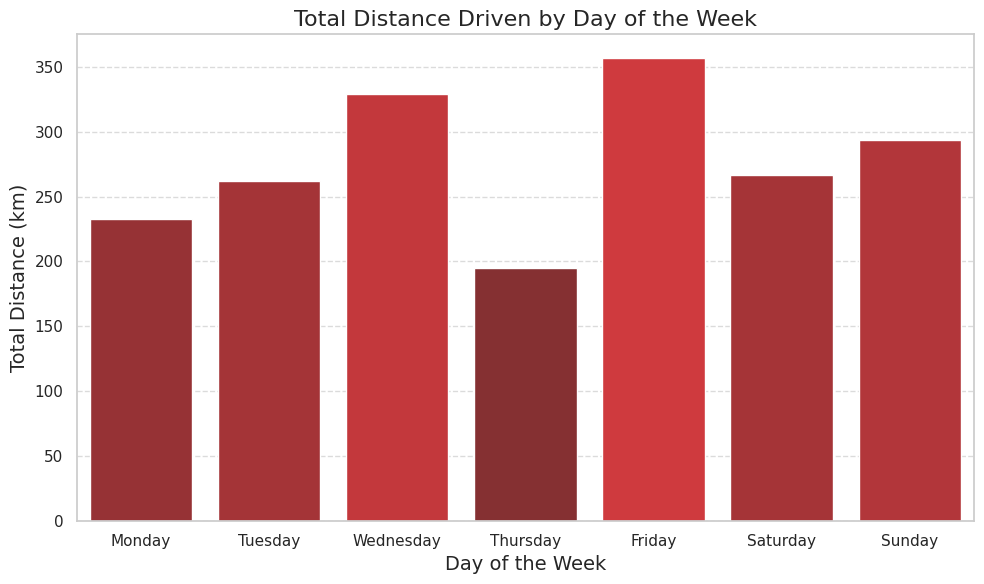

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "datalast.xlsx"  # Replace with your file name
data = pd.read_excel(file_path)

# Extract and clean the "Date" column to get days
data['start_time'] = pd.to_datetime(data['Date'], errors='coerce')
data_cleaned = data.dropna(subset=['start_time'])

# Extract the day of the week
data_cleaned['day'] = data_cleaned['start_time'].dt.day_name()

# Standardize the 'Distance' column to kilometers
def convert_distance(value):
    if isinstance(value, str):
        if 'km' in value:
            return float(value.replace(' km', ''))
        elif 'm' in value:
            return float(value.replace(' m', '')) / 1000  # Convert meters to kilometers
    return 0  # Default to 0 if not a valid value

data_cleaned['Distance'] = data_cleaned['Distance'].apply(convert_distance)

# Group by day of the week and sum the distances
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
distance_by_day = data_cleaned.groupby('day')['Distance'].sum().reindex(day_order, fill_value=0)

# Generate colors with explicit scaling
max_distance = distance_by_day.max()
color_palette = sns.dark_palette("#E82127", n_colors=100, reverse=False)

# Create a list of colors with the darkest color for the maximum value
bar_colors = [
    color_palette[int((distance / max_distance) * 99)] if max_distance != 0 else color_palette[0]
    for distance in distance_by_day
]

# Plotting the total distance driven for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(
    x=distance_by_day.index,
    y=distance_by_day.values,
    palette=bar_colors
)

# Customize the plot
plt.title('Total Distance Driven by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Distance (km)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as an image file
plt.tight_layout()
plt.savefig("total_distance_by_day_explicit_darkness.png", dpi=300)
plt.show()


<ipython-input-55-8f2a109fae74>:36: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from current font.
  plt.tight_layout()
<ipython-input-55-8f2a109fae74>:36: UserWarning: Glyph 127359 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER P}) missing from current font.
  plt.tight_layout()
<ipython-input-55-8f2a109fae74>:36: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from current font.
  plt.tight_layout()
<ipython-input-55-8f2a109fae74>:36: UserWarning: Glyph 128267 (\N{BATTERY}) missing from current font.
  plt.tight_layout()
<ipython-input-55-8f2a109fae74>:36: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  plt.tight_layout()
<ipython-input-55-8f2a109fae74>:39: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from current font.
  plt.savefig("car_states_by_hour.png", dpi=300)
<ipython-input-55-8f2a109fae74>:39: UserWarning: Glyph 127359 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER P}) missing from current font.
  plt.savefig(

<Figure size 1400x800 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10067 (\N{BLACK QUESTION MARK ORNAMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127359 (\N{NEGATIVE SQUARED LATIN CAPITAL LETTER P}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


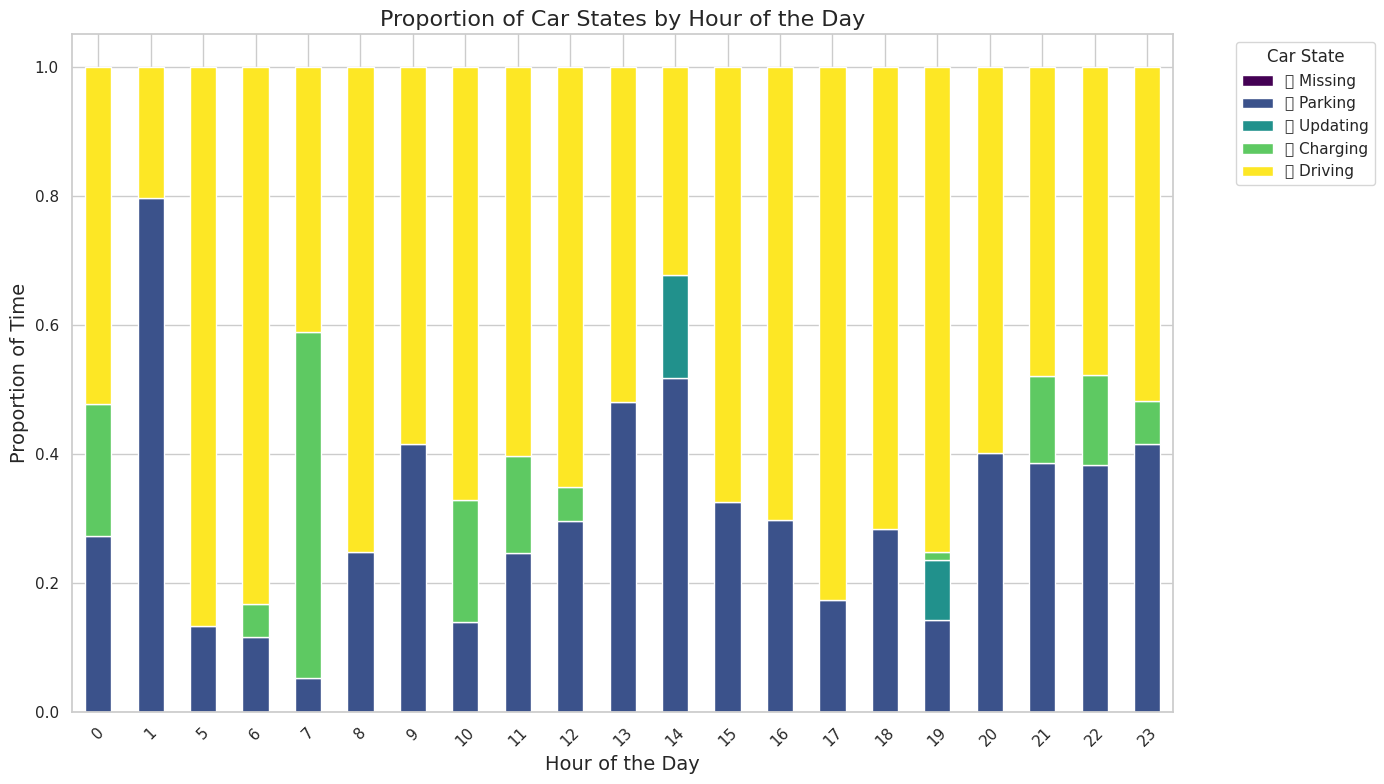

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Timeline-data-12_28_2024, 04_45_29 PM.csv'  # Replace with your file path
timeline_data = pd.read_csv(file_path)

# Convert the 'Start' and 'End' columns to datetime
timeline_data['Start'] = pd.to_datetime(timeline_data['Start'], errors='coerce')
timeline_data['End'] = pd.to_datetime(timeline_data['End'], errors='coerce')

# Extract hour from 'Start' and create a new column for hourly bins
timeline_data['Start Hour'] = timeline_data['Start'].dt.hour

# Convert 'Duration' to numeric in minutes
timeline_data['Duration (min)'] = timeline_data['Duration'].str.extract('(\d+)').astype(float)

# Group by 'Action' and 'Start Hour' and calculate total durations
action_hourly = timeline_data.groupby(['Start Hour', 'Action'])['Duration (min)'].sum().unstack(fill_value=0)

# Normalize the data to represent proportions for better comparison
action_hourly_normalized = action_hourly.div(action_hourly.sum(axis=1), axis=0)

# Create a stacked bar plot to show proportions of actions during the day
plt.figure(figsize=(14, 8))
action_hourly_normalized.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))

# Customize the plot
plt.title('Proportion of Car States by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Proportion of Time', fontsize=14)
plt.legend(title='Car State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Save and show the plot
plt.savefig("car_states_by_hour.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the dataset
timeline_data = pd.read_csv("Timeline-data-12_28_2024, 04_45_29 PM.csv")  # File name only

# Refined duration conversion function
def convert_duration(duration):
    """
    Convert durations to minutes. Handles formats like 'x h', 'y m', 'x hours', 'y min', and invalid values.
    """
    try:
        if isinstance(duration, str):
            duration = duration.lower().strip()  # Normalize case and remove extra spaces
            if 'h' in duration:
                return float(duration.split()[0]) * 60  # Convert hours to minutes
            elif 'm' in duration:
                return float(duration.split()[0])  # Extract minutes
        return 0  # Default to 0 for invalid or missing data
    except Exception as e:
        print(f"Invalid duration encountered: {duration}, Error: {e}")
        return 0

# Apply the conversion function
timeline_data['Duration (min)'] = timeline_data['Duration'].apply(convert_duration)

# Clean and normalize the 'Action' column
timeline_data['Action'] = timeline_data['Action'].str.strip()  # Remove leading/trailing spaces

# Group by 'Action' and calculate the total duration for each action
action_totals = timeline_data.groupby('Action')['Duration (min)'].sum().reset_index()

# Debug: Check unique values in 'Action'
print("Unique Actions:", action_totals['Action'].unique())  # Ensure values match expected color mapping

# Define custom color mapping
custom_colors = {
    'Parking': '#FF0000',   # Bright Red
    'Driving': '#2C2C2C',   # Black
    'Charging': '#FF8C00',  # Orange
    'Updating': '#A9A9A9',  # Gray
    'Missing': '#D3D3D3'    # Light Gray
}


# Create a pie chart using Plotly with red and black style preferences
fig = px.pie(
    action_totals,
    values='Duration (min)',
    names='Action',
    title='Proportion of Car States During the Day',
    color='Action',
    color_discrete_map=custom_colors
)

# Customize layout
fig.update_layout(
    title_font=dict(size=18, color='black', family='Arial'),
    title_x=0.5,
    font=dict(size=14, color='black', family='Arial'),
    legend=dict(
        title="Car States",
        font=dict(size=12, color='black'),
        bgcolor='white',
        bordercolor='black',
        borderwidth=1
    ),
    paper_bgcolor='white',  # Background color
    plot_bgcolor='white'    # Plot background
)

# Display the chart
fig.show()


Unique Actions: ['❓ Missing' '🅿️ Parking' '💾 Updating' '🔋 Charging' '🚗 Driving']


Cleaned Data Head:
    Duration  Distance  % Start  % End  Temp  Ø Speed  max Speed  max Power  \
0       4.0       1.2     0.90   0.89  17.9     18.0       60.0      118.0   
1       3.0     997.0     0.90   0.90  16.0     20.0       43.0       31.0   
2      39.0      45.0     0.99   0.90  15.8     69.0      109.0      145.0   
3       1.0      26.3     0.49   0.49  12.5      2.0       10.0       10.0   
4      32.0      36.8     0.59   0.49  11.5     69.0      138.0      167.0   

   Efficiency  Energy consumed (net)  Ø Consumption (net)  
0      0.3290                  499.5                414.0  
1      0.8205                   59.9                166.0  
2      1.3400                    4.6                102.0  
3      0.8205                    6.8                166.0  
4      0.9570                    5.2                142.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dt

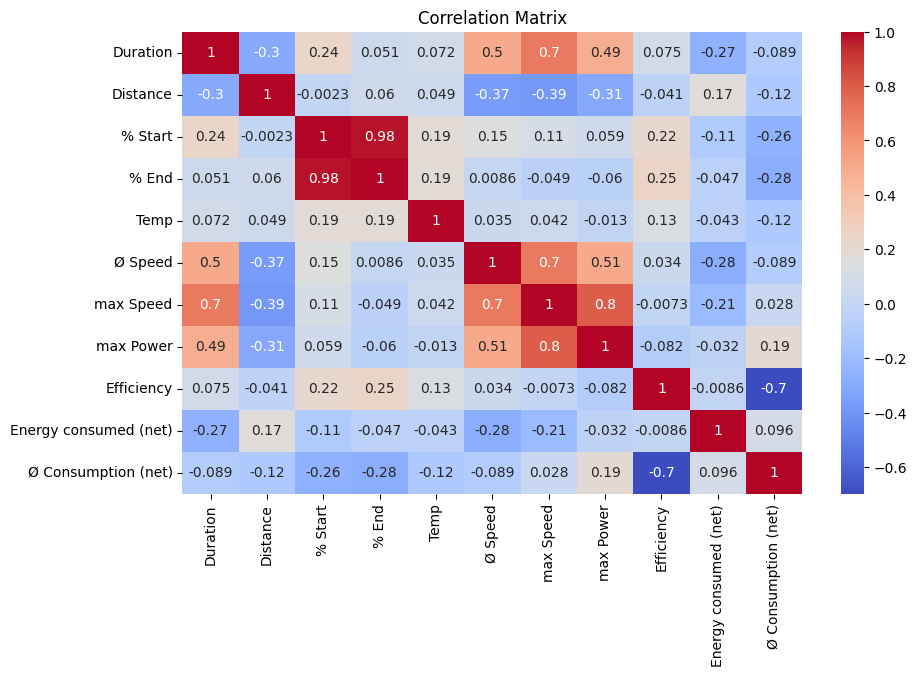

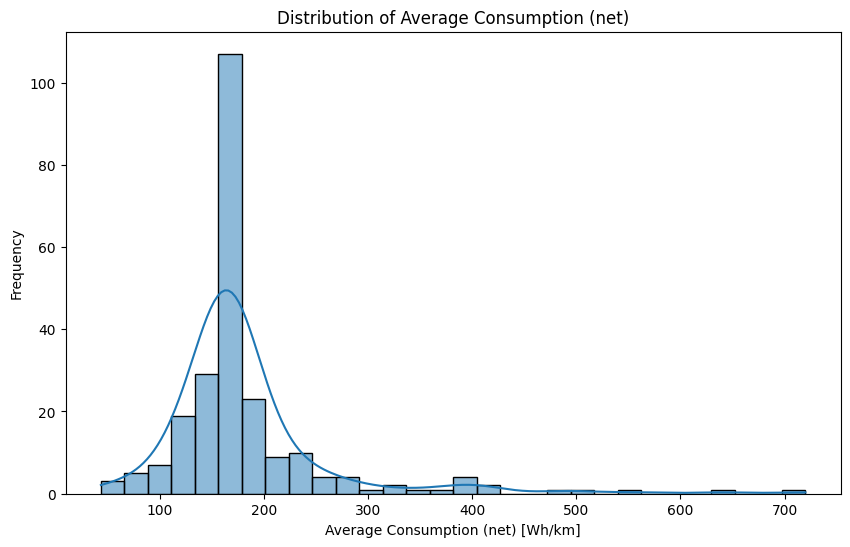

Regression RMSE: 27.86646838309142


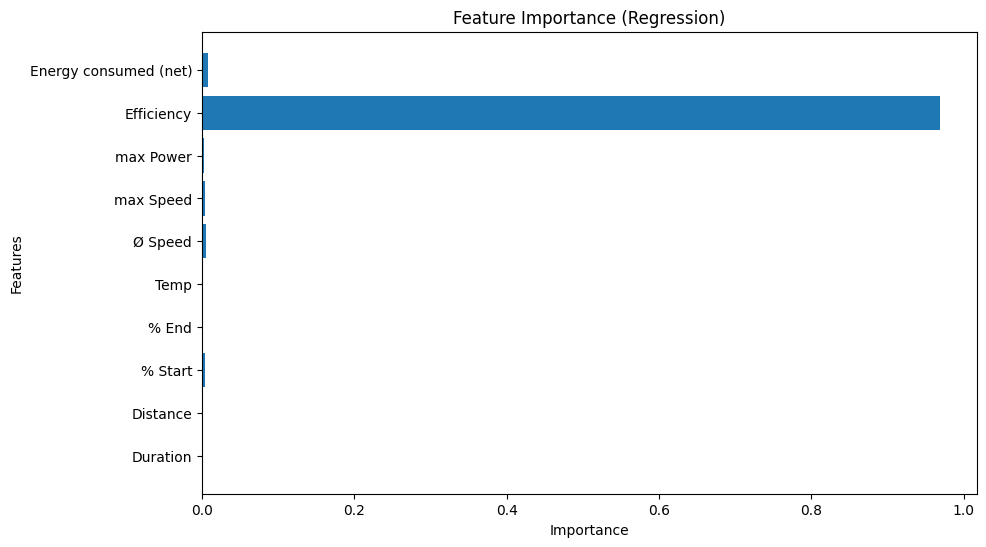

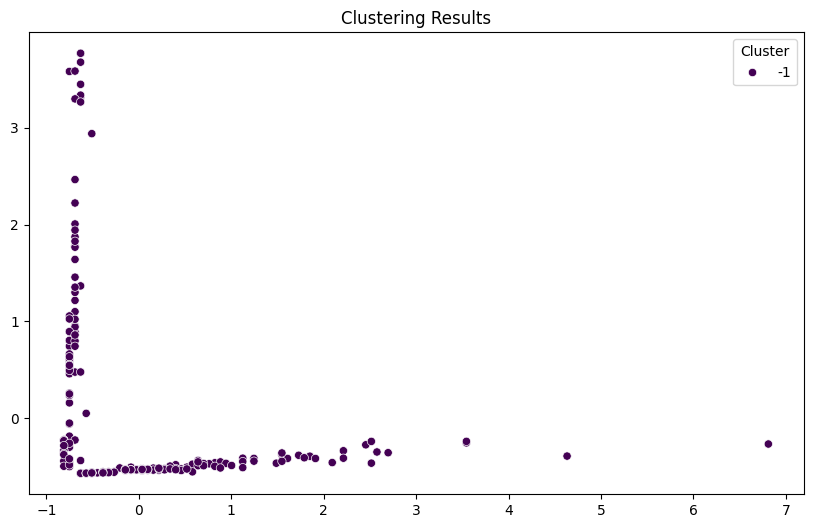

Processed data saved to 'processed_data.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import DBSCAN

# Load dataset
data_path = 'Drive-data-01_10_2025, 04_14_38 PM.csv'  # Replace with your file name
data = pd.read_csv(data_path)

# Drop irrelevant columns
drop_columns = ['start_date_ts', 'end_date_ts', 'car_id', 'start_path', 'end_path',
                'Date', 'Start', 'Destination', 'duration_str', 'drive_id', '❄']
data.drop(columns=drop_columns, inplace=True)

# Clean and preprocess columns
data['% Start'] = data['% Start'].str.rstrip('%').astype(float) / 100
data['% End'] = data['% End'].str.rstrip('%').astype(float) / 100
data['Temp'] = data['Temp'].str.rstrip('°C').astype(float)
data['Efficiency'] = data['Efficiency'].str.rstrip('%').astype(float) / 100
data['Energy consumed (net)'] = data['Energy consumed (net)'].str.replace('kWh', '').str.replace('Wh', '').astype(float)
data['Ø Consumption (net)'] = data['Ø Consumption (net)'].str.replace('Wh/km', '').astype(float)

# Convert duration to minutes
data['Duration'] = data['Duration'].str.replace('min', '').str.replace('hours', '*60').apply(pd.eval).astype(float)

# Convert distance to kilometers
data['Distance'] = data['Distance'].str.replace(' m', '').str.replace('km', '').apply(lambda x: float(x) / 1000 if 'm' in x else float(x))

# Clean and convert speed and power columns
data['Ø Speed'] = data['Ø Speed'].str.replace(' km/h', '').astype(float)
data['max Speed'] = data['max Speed'].str.replace(' km/h', '').astype(float)
data['max Power'] = data['max Power'].str.replace(' kW', '').astype(float)

# Handle missing values
data.fillna(data.median(), inplace=True)



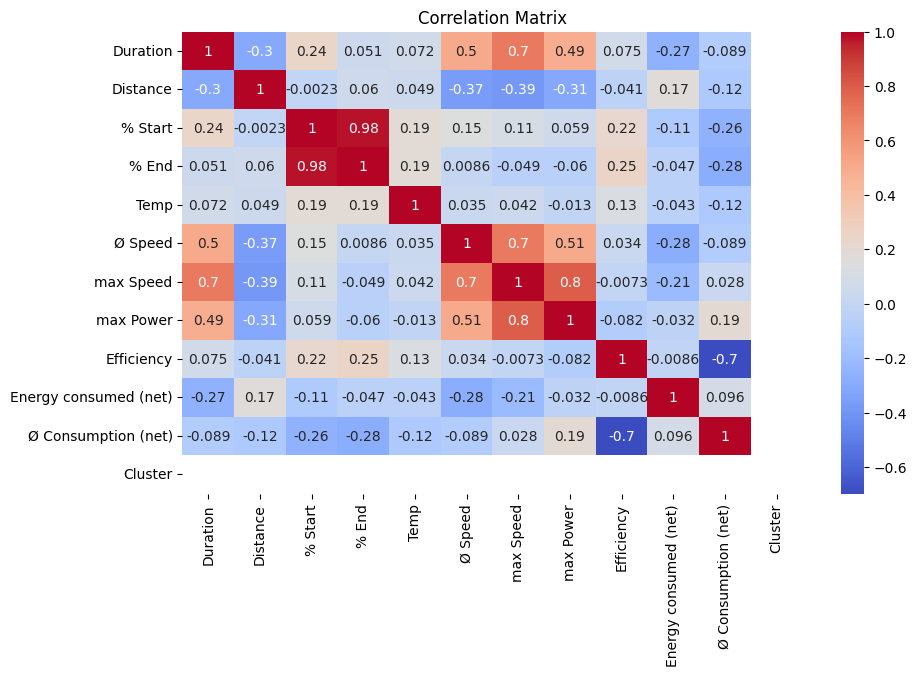

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


* **Efficiency** is strongly negatively correlated with Ø Consumption (net) (-0.7), indicating higher efficiency leads to lower energy consumption.

* max Speed (0.19) and Duration (-0.089) show weaker correlations with Ø Consumption (net).

* Some variables like % Start and % End are highly correlated (0.98), which might indicate redundancy.





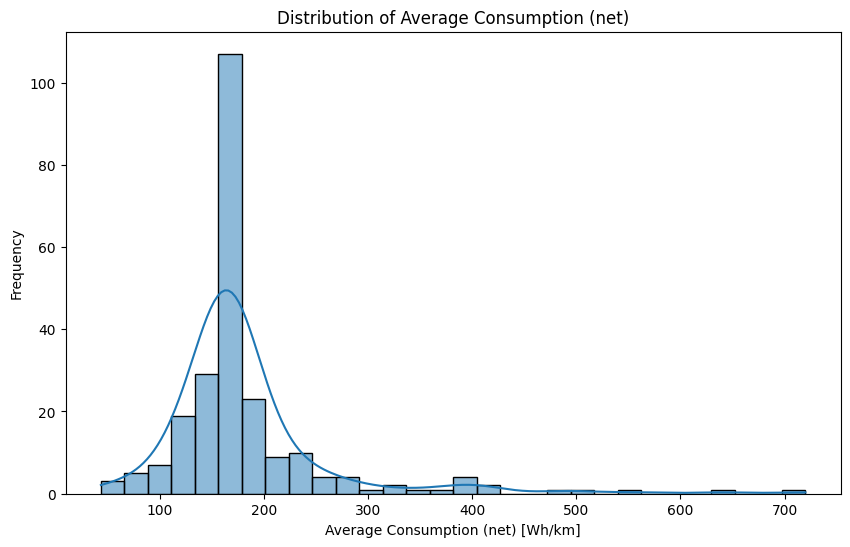

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Ø Consumption (net)'], bins=30, kde=True)
plt.title("Distribution of Average Consumption (net)")
plt.xlabel("Average Consumption (net) [Wh/km]")
plt.ylabel("Frequency")
plt.show()


* Most vehicles have consumption values concentrated around 150-250 Wh/km.
* The distribution has a long tail, indicating a few instances of very high energy consumption.

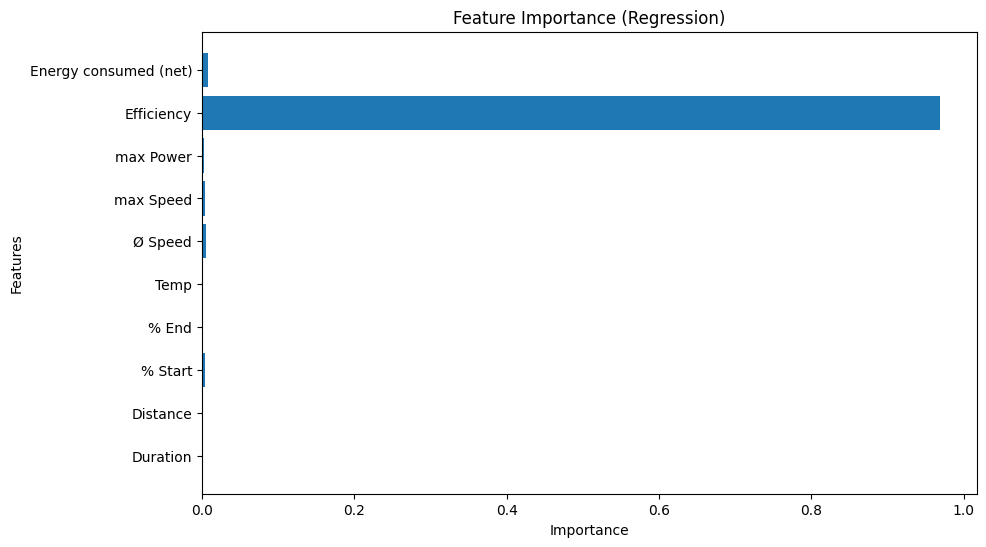

In [42]:
importance = regressor.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.title("Feature Importance (Regression)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


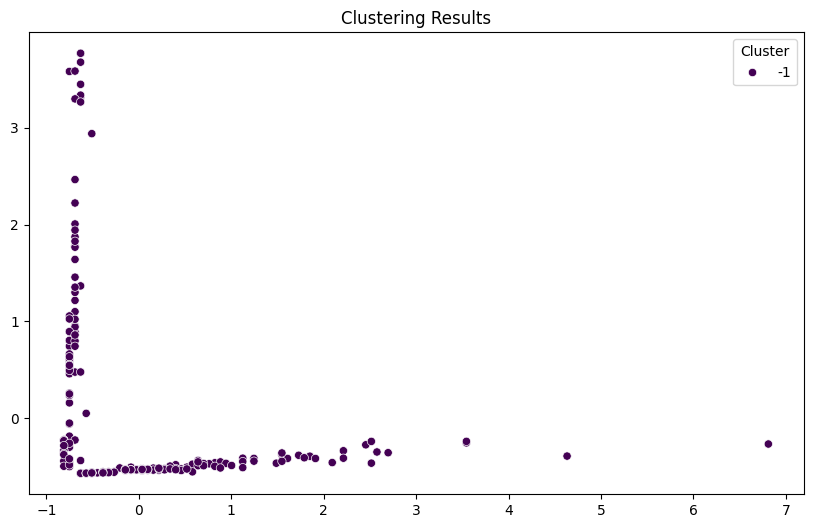

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster'], palette='viridis')
plt.title("Clustering Results")
plt.show()


In [44]:
# Feature-Target Split
X = data.drop(columns=['Ø Consumption (net)'])  # Target column
y_reg = data['Ø Consumption (net)']

# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

# Train Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_reg)

# Evaluate Model
y_pred_reg = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print("Regression RMSE:", rmse)


Regression RMSE: 25.99052514499275


Random Forest Classification Accuracy: 1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         5
         Low       1.00      1.00      1.00         8
    Moderate       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



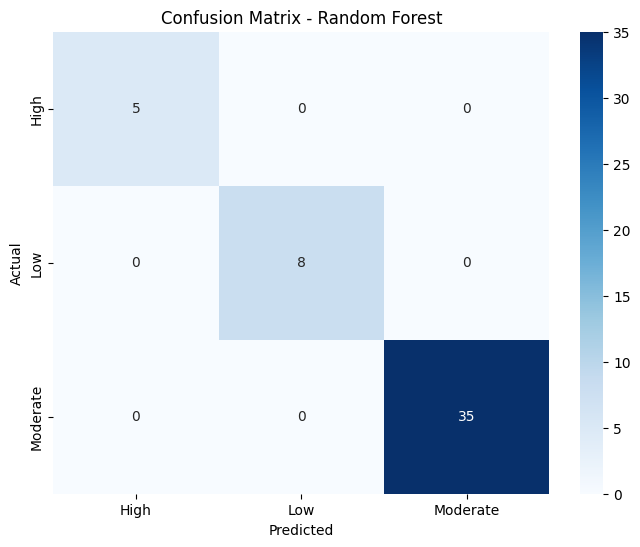

In [50]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_class)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test_class, rf_pred)
print("Random Forest Classification Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test_class, rf_pred, target_names=label_encoder.classes_))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test_class, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Logistic Regression Classification Accuracy: 0.9583333333333334

Logistic Regression Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.80      0.89         5
         Low       1.00      0.88      0.93         8
    Moderate       0.95      1.00      0.97        35

    accuracy                           0.96        48
   macro avg       0.98      0.89      0.93        48
weighted avg       0.96      0.96      0.96        48



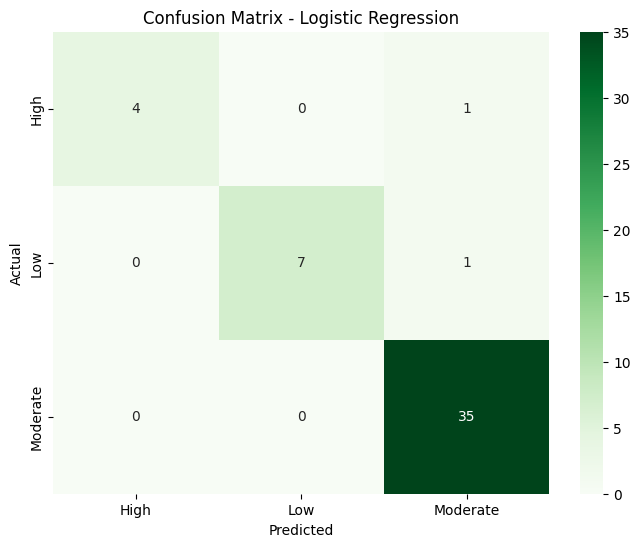

In [52]:
# Logistic Regression
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
logistic_classifier.fit(X_train, y_train_class)
logistic_pred = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test_class, logistic_pred)
print("Logistic Regression Classification Accuracy:", logistic_accuracy)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test_class, logistic_pred, target_names=label_encoder.classes_))

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test_class, logistic_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SVM Classification Accuracy: 0.8541666666666666

SVM Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.40      0.57         5
         Low       1.00      0.50      0.67         8
    Moderate       0.83      1.00      0.91        35

    accuracy                           0.85        48
   macro avg       0.94      0.63      0.72        48
weighted avg       0.88      0.85      0.83        48



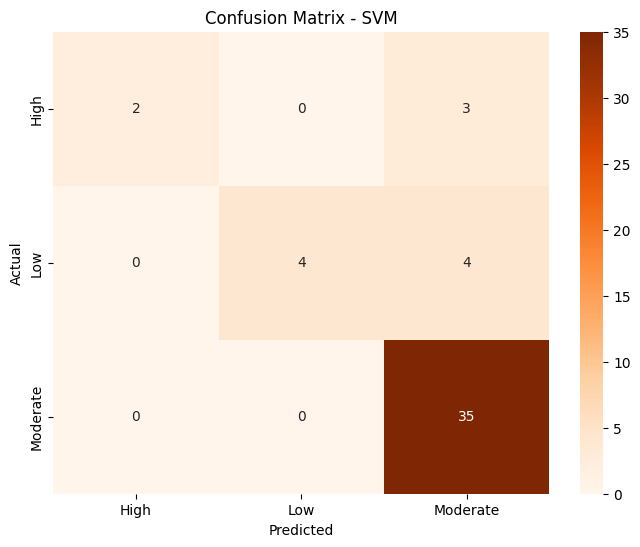

In [51]:
# Support Vector Machine (SVM)
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train_class)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test_class, svm_pred)
print("SVM Classification Accuracy:", svm_accuracy)
print("\nSVM Classification Report:\n", classification_report(y_test_class, svm_pred, target_names=label_encoder.classes_))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_class, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
